In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [2]:
#since it is a data file with no header, we will give the column names 
col_names = ["Industrial Risk", "Management Risk", "Financial Flexibility", "Credibility", "Competitiveness", "Operating Risk", "Class"]

df = pd.read_csv("Qualitative_Bankruptcy.data.csv",names=col_names)

In [3]:
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [4]:
df.shape

(250, 7)

In [5]:
df.dtypes

Industrial Risk          object
Management Risk          object
Financial Flexibility    object
Credibility              object
Competitiveness          object
Operating Risk           object
Class                    object
dtype: object

In [6]:
#since all the features are categorical, we need to encode all these features. 
#Before we do one hot encoding, we will remove the "Class" column from the data frame.
df_copy = df.copy()
df_copy.drop(columns="Class", axis=1,inplace=True)
df_copy.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


In [7]:
#using  get_dummies for encoding
df_copy = pd.get_dummies(df_copy, prefix_sep='_')
df_copy.head()

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [8]:
df_copy.shape

(250, 18)

In [9]:
df_copy.dtypes

Industrial Risk_A          uint8
Industrial Risk_N          uint8
Industrial Risk_P          uint8
Management Risk_A          uint8
Management Risk_N          uint8
Management Risk_P          uint8
Financial Flexibility_A    uint8
Financial Flexibility_N    uint8
Financial Flexibility_P    uint8
Credibility_A              uint8
Credibility_N              uint8
Credibility_P              uint8
Competitiveness_A          uint8
Competitiveness_N          uint8
Competitiveness_P          uint8
Operating Risk_A           uint8
Operating Risk_N           uint8
Operating Risk_P           uint8
dtype: object

In [10]:
#separate out the dependant and target variables
X = df_copy

y = df['Class']
y.head()

0    NB
1    NB
2    NB
3    NB
4    NB
Name: Class, dtype: object

In [11]:
#Do label encoding for target variable before we do the train/test split

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

y = le.fit_transform(y)

In [12]:
#Now do the train/test split in 80:20 ratio
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .20, random_state = 5)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


Xtrain_std = sc.fit_transform(Xtrain)  # scale training and test data independently to prevent data leaks
Xtest_std = sc.fit_transform(Xtest)

## Step 5: Apply PCA on the independant features of train data

In [14]:
# applying PCA on the indepandant features of train data

pca = PCA().fit(Xtrain_std)

## Step 6: Display elbow plot to find out reduced number of dimensions(which covers more than 95% of variance)

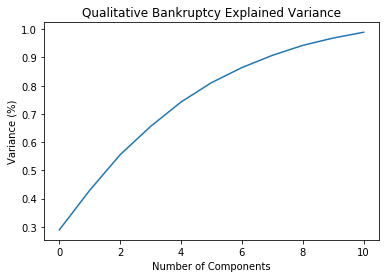

In [32]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Qualitative Bankruptcy Explained Variance')
plt.show()

In [16]:
# Observations:
#As we can see from the above plot, to cover 95% of the variance, almost 11 PCA components are needed 

## Step 7: Transform the data using PCA(select optimum number of PCs)

In [17]:
#we will take optimal number of PCs as 11 and apply the PCA transformation
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(Xtrain_std)
PCdf = pd.DataFrame(principalComponents)
PCdf.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.902270,0.038949,1.626238,-0.507387,-0.869703,-1.301495,3.084502,-0.448541,0.082981,-0.154273,0.714324
1,2.818257,0.138806,-0.524401,1.678887,-0.101485,-0.859937,-1.205870,-0.163211,0.883629,-1.081100,-0.715328
2,2.773730,-0.282208,0.523528,-1.574699,-0.169943,-0.753109,0.315874,0.985907,0.640444,0.451521,0.184985
3,-1.757432,0.978185,1.705545,0.517241,2.031871,0.731470,2.093027,-1.182926,-0.451020,1.127332,0.066130
4,2.773730,-0.282208,0.523528,-1.574699,-0.169943,-0.753109,0.315874,0.985907,0.640444,0.451521,0.184985


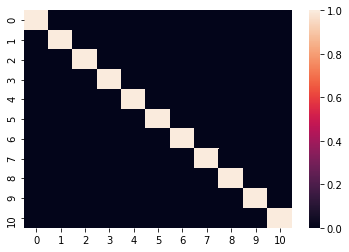

In [18]:
sns.heatmap(PCdf.corr())

## Step 8: Apply Kmeans on the above transformed data. 

In [19]:
from sklearn.cluster import KMeans

# Let us check optimal number of clusters-


cluster_range = range( 1, 15)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(PCdf)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3557.418814
1,2,2748.123738
2,3,2448.762099
3,4,2249.812924
4,5,2103.222925
5,6,1942.493194
6,7,1859.369244
7,8,1775.017419
8,9,1690.575989
9,10,1581.443745


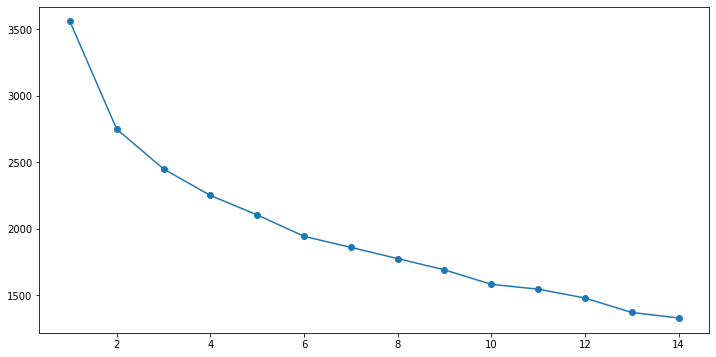

In [20]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## Step 9: Select optimal number of clusters and form clusters out of the train data

In [21]:
#Observation: From the above elbow plot we cannot conclude anything on the optimal number of clusters. So we try to see
# silhoutte method as well

For n_clusters = 2 The average silhouette_score is : 0.22107581133768256


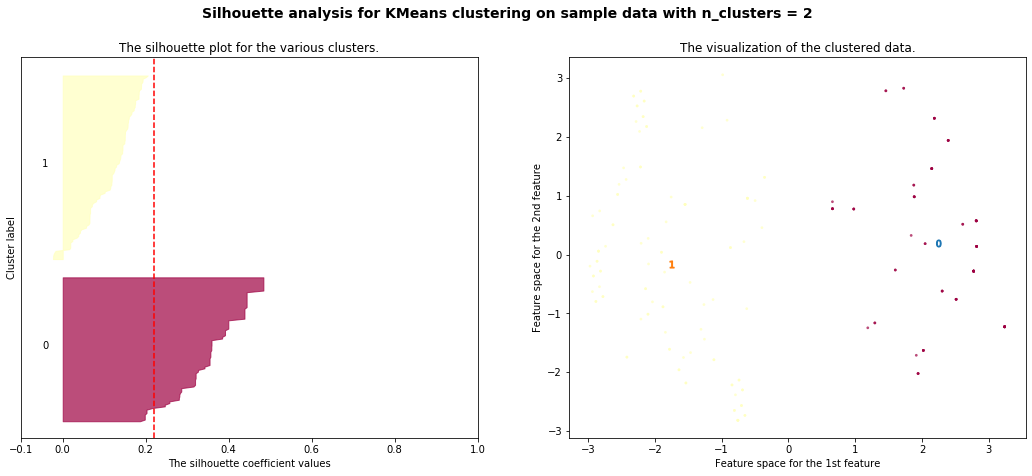

For n_clusters = 3 The average silhouette_score is : 0.22544488527341755


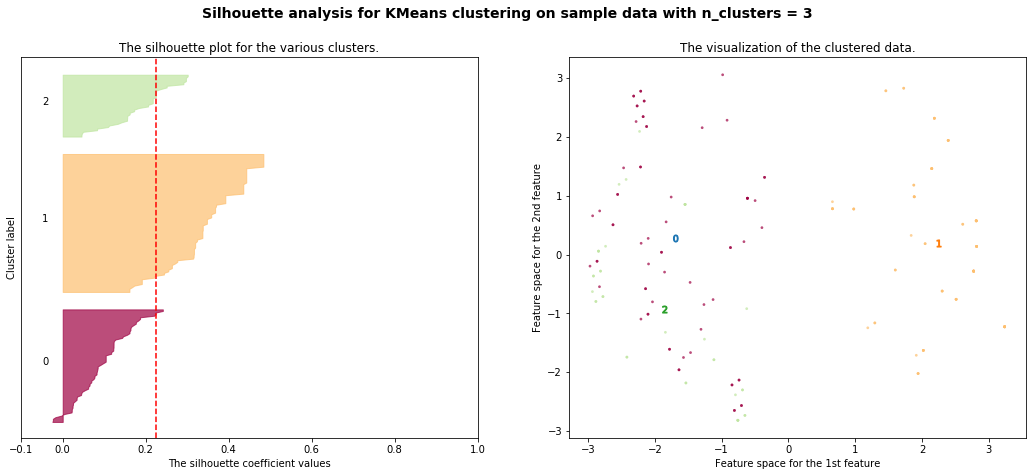

For n_clusters = 4 The average silhouette_score is : 0.23163693899280982


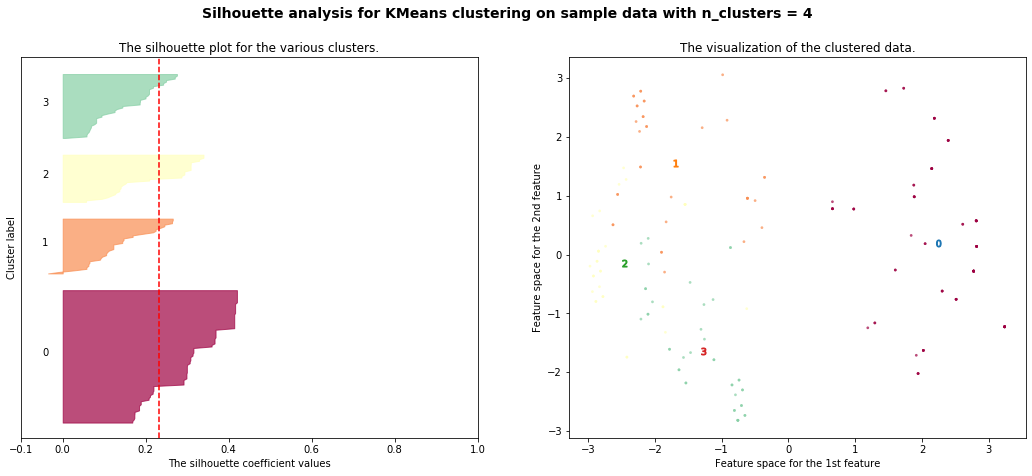

For n_clusters = 5 The average silhouette_score is : 0.17372267510703035


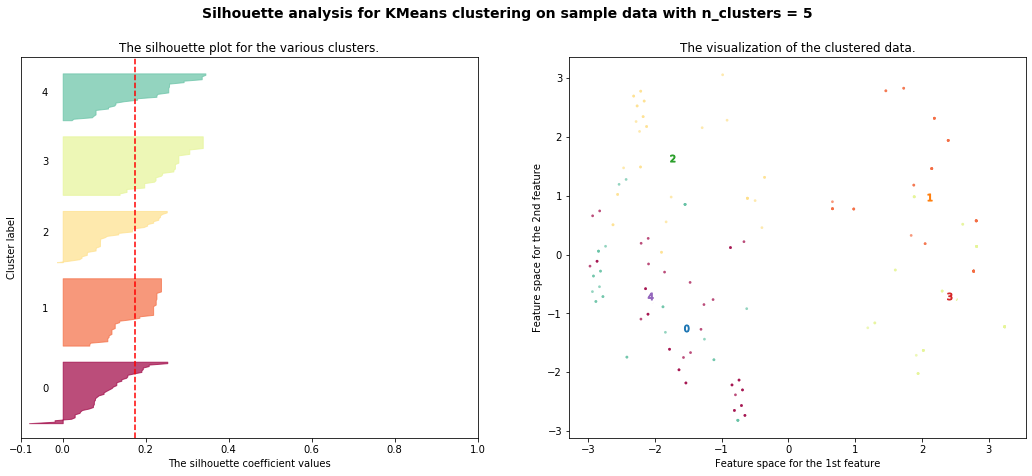

For n_clusters = 6 The average silhouette_score is : 0.19173648734018728


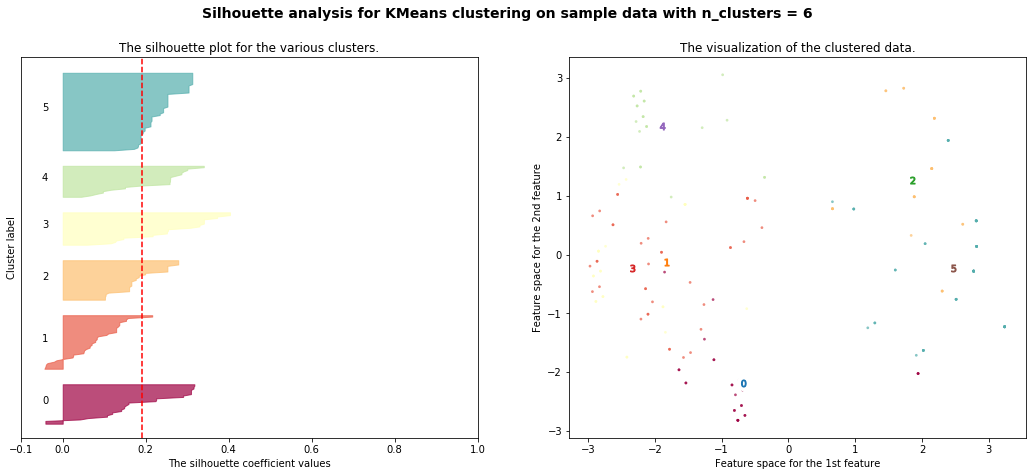

For n_clusters = 7 The average silhouette_score is : 0.1933359438187174


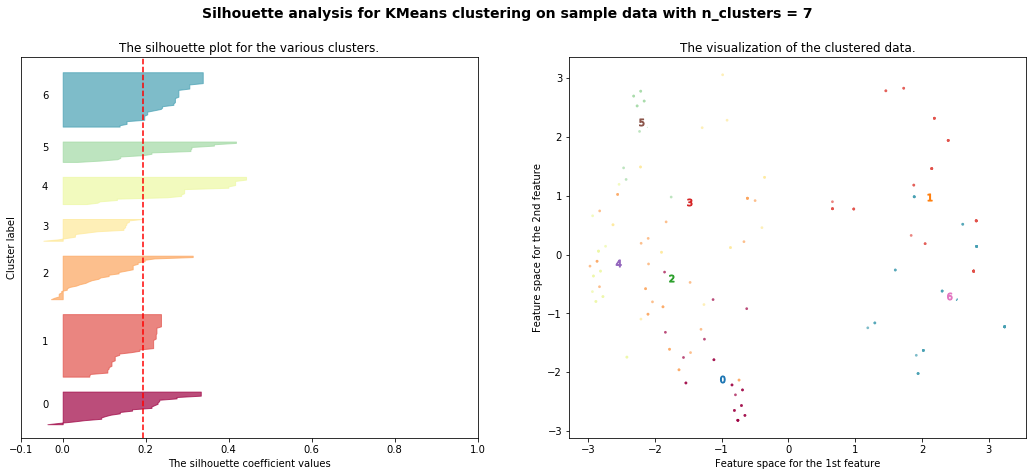

For n_clusters = 8 The average silhouette_score is : 0.198120813073983


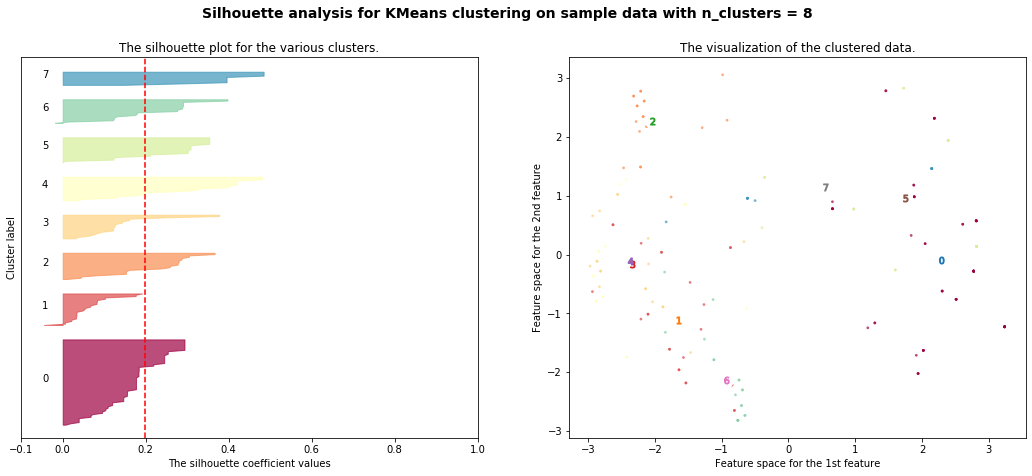

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(PCdf) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(PCdf)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(PCdf, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(PCdf, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(principalComponents[:, 0], principalComponents[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
               marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [23]:
#Observation - From the above silhoutte analysis, we can say that n_clusters = 3 has the best silohutte average and we will
#go with n_clusters=3

In [24]:
#Now form clusters out of the train data
# Number of clusters

kmeans = KMeans(n_clusters=3, random_state=5)

# Fitting the input data

kmeans = kmeans.fit(PCdf)

# Getting the cluster labels

labels = kmeans.predict(PCdf)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

print("labels", labels)

Centroid values
sklearn
[[-1.91225042e+00 -3.68119038e-01 -1.47128111e+00 -1.77609337e-01
   6.63141162e-01 -2.74183825e-01  8.43070701e-03  7.26490583e-01
  -6.19781881e-01 -2.34814767e-01  6.05036839e-02]
 [ 2.24219203e+00  1.99881332e-01 -1.73883596e-01 -1.73770687e-01
   3.42937786e-02  7.96779540e-02 -7.57271249e-02 -8.29940690e-02
   3.66342255e-02 -2.75774366e-02 -5.96590147e-04]
 [-1.66432176e+00 -2.04752870e-02  1.17703125e+00  3.39803401e-01
  -4.73471524e-01  7.43004170e-02  9.25446453e-02 -3.62678053e-01
   3.53626337e-01  1.87627414e-01 -3.83773847e-02]]
labels [2 1 1 2 1 2 1 1 2 1 1 2 1 0 1 2 1 2 1 1 2 1 1 0 1 1 2 1 1 0 1 2 2 1 2 0 0
 0 2 1 1 1 1 2 2 2 1 2 0 2 1 0 2 2 0 2 2 1 1 1 2 0 2 1 1 2 1 0 1 0 1 0 1 2
 1 2 0 1 2 2 0 1 2 0 2 0 2 0 2 0 2 2 2 1 2 1 1 2 1 1 2 1 1 0 2 1 2 1 0 0 1
 1 0 1 1 0 1 2 1 2 1 0 2 2 1 1 0 1 1 2 2 0 2 2 2 1 0 0 2 0 1 2 1 1 0 2 0 2
 1 1 0 1 0 2 0 2 2 1 1 0 1 0 1 2 0 2 0 1 0 2 1 2 1 2 1 1 2 0 2 1 2 1 1 0 1
 1 2 1 1 1 1 0 2 1 0 1 1 1 1 2]


## Step 10: Create a new column in the train data and populate it with the cluster labels.

In [25]:
#taking all cluster labels into clust_arr numpy arr
print("Before: ", principalComponents.shape)
principalComponentsNew = np.column_stack((principalComponents, labels))
print("After: ", principalComponentsNew.shape)

Before:  (200, 11)
After:  (200, 12)


## Step 11: Transform the test data using the same PCA object that was fit on the train data

In [26]:
principalComponentsTest = pca.fit_transform(Xtest_std)
print(principalComponentsTest.shape)

(50, 11)


## Step 12: Use the same Kmeans object, assign cluster labels to the test data and store it as a feature

In [27]:
#use the same Kmeans object which was used for train data

kmeans = kmeans.fit(principalComponentsTest)

# Getting the cluster labels for the test data and storing it in labels_test
labels_test = kmeans.predict(principalComponentsTest)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

print("labels_test", labels_test)

Centroid values
sklearn
[[-1.04779693  1.29001433 -2.14229392 -0.0706641   1.13795353  0.24895034
   0.53366325 -0.78312642 -0.05753116  0.08601852  0.01344845]
 [ 2.68934275 -0.17172387  0.06758933 -0.31955284 -0.23525782 -0.14056954
  -0.08375502 -0.05084168  0.01433162  0.00413481 -0.02673538]
 [-1.85717986 -0.30684179  0.68931105  0.28855725 -0.20146651  0.02953124
  -0.11643307  0.31439145  0.00817167 -0.0333352   0.01740802]]
labels_test [2 1 1 2 1 2 1 0 2 1 2 2 1 2 2 1 1 1 1 0 2 2 1 2 2 1 2 0 1 1 2 1 2 1 1 2 1
 2 2 0 2 1 2 0 2 0 0 0 2 2]


## Step 13: Apply SVC model on train dataset and predict target for test data set
## Step 14: Check accuracy and confusion matrix

### SVC model using PCA transformed train and test data

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# Building a Support Vector Machine on train data
print("SVC with kernel = linear")
svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(principalComponents, ytrain)
prediction = svc_model.predict(principalComponentsTest)
# check the accuracy on the training set
print("Train accuracy = ",svc_model.score(principalComponents, ytrain))
print("Test accuracy = ",svc_model.score(principalComponentsTest, ytest))
print("Confusion Matrix:\n",confusion_matrix(prediction,ytest))


# Building a Support Vector Machine on train data
print("SVC with kernel = rbf")
svc_model = SVC(kernel='rbf')
svc_model.fit(principalComponents, ytrain)
prediction = svc_model.predict(principalComponentsTest)
print("Train accuracy = ",svc_model.score(principalComponents, ytrain))
print("Test accuracy = ",svc_model.score(principalComponentsTest, ytest))
print("Confusion Matrix:\n",confusion_matrix(prediction,ytest))



# Building a Support Vector Machine on train data
print("SVC with kernel = poly")
svc_model  = SVC(kernel='poly')
svc_model.fit(principalComponents, ytrain)
prediction = svc_model.predict(principalComponentsTest)
print("Train accuracy = ",svc_model.score(principalComponents, ytrain))
print("Test accuracy = ",svc_model.score(principalComponentsTest, ytest))
print("Confusion Matrix:\n",confusion_matrix(prediction,ytest))

print("SVC with kernel = sigmoid")
svc_model = SVC(kernel='sigmoid')
svc_model.fit(principalComponents, ytrain)
prediction = svc_model.predict(principalComponentsTest)
print("Train accuracy = ",svc_model.score(principalComponents, ytrain))
print("Test accuracy = ",svc_model.score(principalComponentsTest, ytest))
print("Confusion Matrix:\n",confusion_matrix(prediction,ytest))

SVC with kernel = linear
Train accuracy =  0.995
Test accuracy =  0.94
Confusion Matrix:
 [[19  3]
 [ 0 28]]
SVC with kernel = rbf
Train accuracy =  1.0
Test accuracy =  1.0
Confusion Matrix:
 [[19  0]
 [ 0 31]]
SVC with kernel = poly
Train accuracy =  1.0
Test accuracy =  0.92
Confusion Matrix:
 [[19  4]
 [ 0 27]]
SVC with kernel = sigmoid
Train accuracy =  0.945
Test accuracy =  0.94
Confusion Matrix:
 [[19  3]
 [ 0 28]]


C:\Users\nm949133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nm949133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nm949133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

### SVC model using original train and test data(not PCA transformed)

In [40]:

# Building a Support Vector Machine on train data
print("SVC with kernel = linear")
svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(Xtrain, ytrain)
prediction = svc_model.predict(Xtest)
# check the accuracy on the training set
print("Train accuracy = ",svc_model.score(Xtrain, ytrain))
print("Test accuracy = ",svc_model.score(Xtest, ytest))
print("Confusion Matrix:\n",confusion_matrix(prediction,ytest))


# Building a Support Vector Machine on train data
print("SVC with kernel = rbf")
svc_model = SVC(kernel='rbf')
svc_model.fit(Xtrain, ytrain)
prediction = svc_model.predict(Xtest)
print("Train accuracy = ",svc_model.score(Xtrain, ytrain))
print("Test accuracy = ",svc_model.score(Xtest, ytest))
print("Confusion Matrix:\n",confusion_matrix(prediction,ytest))



# Building a Support Vector Machine on train data
print("SVC with kernel = poly")
svc_model  = SVC(kernel='poly')
svc_model.fit(Xtrain, ytrain)
prediction = svc_model.predict(Xtest)
print("Train accuracy = ",svc_model.score(Xtrain, ytrain))
print("Test accuracy = ",svc_model.score(Xtest, ytest))
print("Confusion Matrix:\n",confusion_matrix(prediction,ytest))

print("SVC with kernel = sigmoid")
svc_model = SVC(kernel='sigmoid')
svc_model.fit(Xtrain, ytrain)
prediction = svc_model.predict(Xtest)
print("Train accuracy = ",svc_model.score(Xtrain, ytrain))
print("Test accuracy = ",svc_model.score(Xtest, ytest))
print("Confusion Matrix:\n",confusion_matrix(prediction,ytest))

SVC with kernel = linear
Train accuracy =  0.985
Test accuracy =  0.98
Confusion Matrix:
 [[18  0]
 [ 1 31]]
SVC with kernel = rbf
Train accuracy =  1.0
Test accuracy =  1.0
Confusion Matrix:
 [[19  0]
 [ 0 31]]
SVC with kernel = poly
Train accuracy =  0.925
Test accuracy =  0.9
Confusion Matrix:
 [[14  0]
 [ 5 31]]
SVC with kernel = sigmoid
Train accuracy =  0.985
Test accuracy =  0.98
Confusion Matrix:
 [[18  0]
 [ 1 31]]


C:\Users\nm949133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nm949133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nm949133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

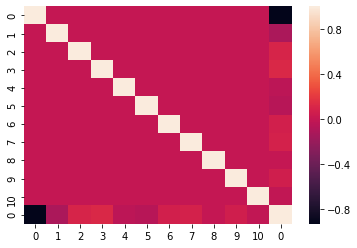

In [31]:
y_df = pd.DataFrame(ytrain)
newdf = pd.concat([PCdf, y_df], axis=1)
sns.heatmap(newdf.corr())

# Observations:
## 1. There is a very high correlation between target and first PCA (pc0)
## 2. Correlation between other PCA dimensions and target is very low
